### 📦 Briefing do Projeto – Vendas XPTO

#### 🧩 Cenário
A empresa XPTO está em expansão e deseja modernizar suas decisões comerciais com base em dados.

O departamento de vendas forneceu dois arquivos para a equipe de dados:
- `base_vendas.csv`: com as vendas realizadas.
- `aumento.csv`: com os percentuais de aumento dos produtos por categoria.

#### 🎯 Objetivos do Projeto
1. Aplicar os percentuais de acréscimo às vendas e criar uma nova coluna com o valor ajustado.
2. Realizar um comparativo por categoria (antes e depois do acréscimo).
3. Calcular a comissão de cada vendedor (2,5% sobre o total vendido).
4. Gerar gráficos para apoiar a análise (barras comparativas e comissão).
5. Organizar os dados e simular o envio dos resultados por e-mail.

#### 🔍 Situação Problema

A empresa XPTO forneceu dois arquivos CSV:

- `base_vendas.csv`: registros das vendas realizadas.
- `aumento.csv`: percentuais de aumento por categoria de produto.

Sua missão:
1. Aplicar os percentuais de aumento aos dados de venda.
2. Calcular a comissão dos vendedores (2,5%).
3. Realizar análises agregadas por categoria e por vendedor.
4. Gerar gráficos comparativos.
5. Responder o Desafio.


#### 💡 O que se espera de você?
- Que organize os dados de forma clara e limpa;
- Aplique os cálculos e gere as visualizações corretamente;
- Responda aos desafios e complete os blocos de código propostos.


#### Esse projeto é um ótimo exemplo de como Python pode ser usado para automatizar análises comerciais reais. 😉
---

### Etapa 1: Instalação de bibliotecas

Execute o código abaixo para instalar a biblioteca `chardet` se necessário ou repita o processo para as demais bibliotecas.

In [1]:
!pip install chardet

### Etapa 2: Importação de bibliotecas

**Exercício:** Execute o código abaixo para importar as bibliotecas que serão usadas neste notebook.

In [2]:
import pandas as pd
import numpy as np
import chardet
import matplotlib.pyplot as plt
import seaborn as sns


### Etapa 3: Como descobrir encoding do arquivo CSV

🚨 **Exercício:** Use a biblioteca `chardet` para descobrir o encoding do arquivo `base_vendas.csv` e `categorias_valores.csv`.

In [4]:
rawdata = open('base_vendas.csv', 'rb').read()
encoding = chardet.detect(rawdata)['encoding']
print('Encoding detectado:', encoding)

Encoding detectado: ISO-8859-1


In [5]:
rawdata = open('categorias_valores.csv', 'rb').read()
encoding2 = chardet.detect(rawdata)['encoding']
print('Encoding detectado:', encoding2)

Encoding detectado: utf-8


### ℹ️ Entendendo o que é *Encoding*

Quando lemos arquivos `.csv`, precisamos informar ao Python **como os caracteres estão codificados** no arquivo. Essa codificação é chamada de **encoding**.

📌 **Encoding** é o formato que traduz os textos em bytes para que possam ser armazenados em arquivos.

Os encodings mais comuns são:

- **UTF-8**: É o mais utilizado atualmente. Compatível com acentos, símbolos e idiomas diversos. É a codificação padrão na internet.
- **ISO-8859-1** (ou Latin-1): Era muito usada em arquivos de sistemas antigos ou exportações do Excel em português. Também suporta acentos, mas com codificação diferente da UTF-8.

⚠️ Se o encoding for informado errado, os dados podem aparecer com caracteres quebrados, como `Ã©` em vez de `é`.

✅ Por isso usamos a biblioteca `chardet` para detectar automaticamente o encoding antes de carregar os dados com `pd.read_csv(...)`.

Exemplo prático:
```python
df = pd.read_csv("base_vendas.csv", encoding="ISO-8859-1", sep=";")


### Etapa 3.1: Crie o dataframe com os arquivos csv.


In [6]:
df_vendas = pd.read_csv('base_vendas.csv', encoding="ISO-8859-1", sep=';')
df_categorias = pd.read_csv('categorias_valores.csv', encoding='utf-8', sep=',')

### Etapa 4: Estrutura e Diagnóstico Inicial dos Dados (EDA)

Antes de partirmos para a exploração gráfica, vamos entender a estrutura da base:

In [8]:
# Veja as primeiras linhas do dataframe de vendas
df_vendas.head(5)

,cod_produto,nome_produto,categoria_produto,segmento_produto,marca_produto,cod_vendedor,nome_vendedor,cod_loja,cidade_loja,estado_loja,data_venda,valor_venda
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,1009,Ana Teixeira,SP8821,São Paulo,São Paulo,04/10/2012,679.00
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,1006,Josias Silva,SP8821,São Paulo,São Paulo,01/01/2012,832.00
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,1006,Josias Silva,SP8821,São Paulo,São Paulo,02/02/2012,790.00
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,1003,Mateus Gonçalves,SP8821,São Paulo,São Paulo,03/03/2012,765.32
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,1004,Artur Moreira,SP8821,São Paulo,São Paulo,04/04/2012,459.89


In [9]:
# Veja as primeiras linhas do dataframe de categorias
df_categorias.head(5)

,Categoria,Valor
0,Celulares,1.20
1,Eletrodomésticos,1.15
2,Eletrônicos,1.23
3,Eletroportáteis,2.00


In [10]:
# Verifique os tipos de dados e colunas do dataframs de vendas
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cod_produto        457 non-null    object 
 1   nome_produto       457 non-null    object 
 2   categoria_produto  457 non-null    object 
 3   segmento_produto   457 non-null    object 
 4   marca_produto      457 non-null    object 
 5   cod_vendedor       457 non-null    int64  
 6   nome_vendedor      457 non-null    object 
 7   cod_loja           457 non-null    object 
 8   cidade_loja        457 non-null    object 
 9   estado_loja        457 non-null    object 
 10  data_venda         457 non-null    object 
 11  valor_venda        457 non-null    float64
dtypes: float64(1), int64(1), object(10)
memory usage: 43.0+ KB


In [11]:
# Verifique os tipos de dados e colunas do dataframe de categorias
df_categorias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Categoria  4 non-null      object 
 1   Valor      4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 196.0+ bytes


In [12]:
# Verifique os valores nulos do dataframe de vendas.
df_vendas.isnull().sum()

cod_produto          0
nome_produto         0
categoria_produto    0
segmento_produto     0
marca_produto        0
cod_vendedor         0
nome_vendedor        0
cod_loja             0
cidade_loja          0
estado_loja          0
data_venda           0
valor_venda          0
dtype: int64

In [13]:
# Verifique os valores nulos do dataframe de categorias
df_categorias.isnull().sum()

Categoria    0
Valor        0
dtype: int64

In [14]:
# Verifique a estatistica das colunas textuais do dataframe de categorias.
df_categorias.describe(include=['object'])

,Categoria
count,4
unique,4
top,Celulares
freq,1


In [15]:
# Verifique a estatistica das colunas textuais do dataframe de vendas.
df_vendas.describe(include=['object'])

,cod_produto,nome_produto,categoria_produto,segmento_produto,marca_produto,nome_vendedor,cod_loja,cidade_loja,estado_loja,data_venda
count,457,457,457,457,457,457,457,457,457,457
unique,457,19,4,3,14,9,14,10,6,108
top,SKU-0000001,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,André Pereira,SP8822,São Paulo,São Paulo,02/12/2015
freq,1,110,226,405,94,84,98,205,214,16


In [17]:
# Verifique a estatistica das colunas numéricas do dataframe de vendas.
df_vendas.describe().round(2)

,cod_vendedor,valor_venda
count,457.00,457.00
mean,1004.09,790.11
std,2.46,755.54
min,1001.00,12.00
25%,1002.00,167.00
50%,1004.00,671.00
75%,1006.00,1230.00
max,1009.00,3999.00


In [18]:
# Verifique a estatistica das colunas numéricas do dataframe de categorias.
df_categorias.describe().round(2)

,Valor
count,4.00
mean,1.40
std,0.40
min,1.15
25%,1.19
50%,1.21
75%,1.42
max,2.00


In [19]:
# Verifique os valores únicos da coluna 'Categoria' do dataframe de categorias.
df_categorias['Categoria'].unique()

array(['Celulares', 'Eletrodomésticos', 'Eletrônicos', 'Eletroportáteis'],
      dtype=object)

In [20]:
# Verifique os valores únicos da coluna 'categoria_produto' do dataframe de vendas.
df_vendas['categoria_produto'].unique()

array(['Celulares', 'Eletrodomésticos', 'Eletrônicos', 'Eletroportáteis'],
      dtype=object)

In [21]:
# Verifique os valores únicos da coluna 'nome_vendedor' do dataframe de vendas.
df_vendas['nome_vendedor'].unique()

array(['Ana Teixeira', 'Josias Silva', 'Mateus Gonçalves',
       'Artur Moreira', 'Rodrigo Fagundes', 'Fernando Zambrini',
       'André Pereira', 'Maria Fernandes', 'Aline Sutter'], dtype=object)

In [23]:
# Verifique os valores únicos da coluna 'categoria_produto' do dataframe de vendas, fazendo a contagem nos resultados.
df_vendas['categoria_produto'].value_counts()

categoria_produto
Eletrodomésticos    226
Eletroportáteis     124
Eletrônicos          60
Celulares            47
Name: count, dtype: int64

In [24]:
# Verifique a estatística da categoria do produto por valor de venda.
df_vendas.groupby('categoria_produto')['valor_venda'].describe()

,count,mean,std,min,25%,50%,75%,max
categoria_produto,,,,,,,,
Celulares,47.0,2104.936170,1319.291747,679.0,1230.0,1230.00,3999.0000,3999.00
Eletrodomésticos,226.0,861.788097,417.850493,120.0,455.0,875.50,1234.1200,1899.00
Eletroportáteis,124.0,153.672984,82.246400,12.0,128.0,149.00,149.0000,765.45
Eletrônicos,60.0,805.492500,355.799299,234.0,456.0,739.17,1000.4925,1788.00


### Etapa 5: Análise Gráfica

Agora sim, vamos explorar graficamente os dados!

##### Plot um Histograma de Distribuição dos Valores de Venda

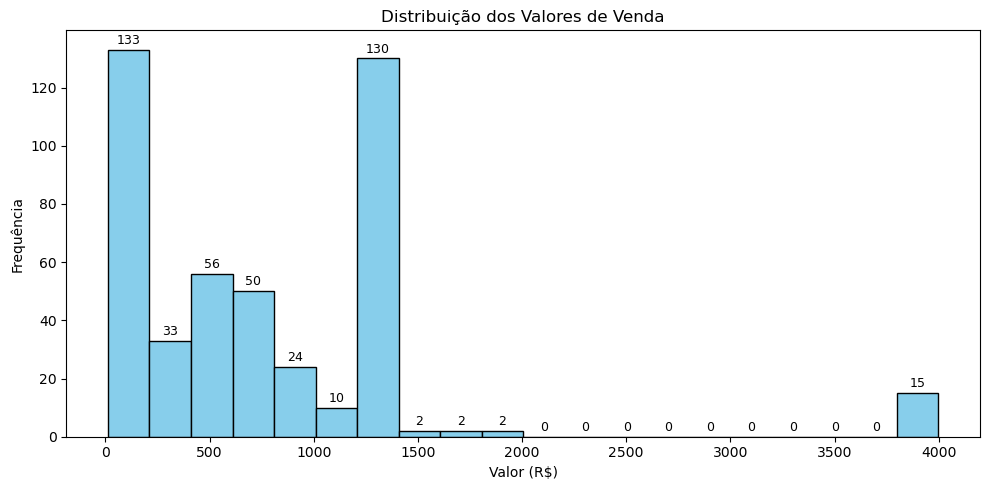

In [25]:
plt.figure(figsize=(10, 5))
n, bins, patches = plt.hist(df_vendas['valor_venda'], bins=20, color='skyblue', edgecolor='black')

plt.title('Distribuição dos Valores de Venda')
plt.xlabel('Valor (R$)')
plt.ylabel('Frequência')

# Adicionando rótulos nas barras
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width()/2,
             n[i] + 2,  # posição acima da barra
             int(n[i]),
             ha='center', fontsize=9)

plt.tight_layout()
plt.show()

##### Plot um Gráfico de barras por marca de produto


##### Plot um Boxplot por categoria (para visualizar dispersão dos valores.

### Etapa 6: Questões **DESAFIO**
🚨 **Desafio 1:** Renomeie a coluna `valor` para `percentual_aumento` e una os dois DataFrames.

🚨 **Desafio 2:** Crie uma nova coluna no resultado do ultimo dataframe criado chamada `venda_final` aplicando o percentual de aumento.

🚨 **Desafio 3:** Faça uma visualização agrupado por `categoria` e gerado um gráfico comparando os valores originais e com aumento.

🚨 **Desafio 4:** Faça uma análise Calculando a comissão de 2,5% para cada vendedor.

🚨 **Desafio 5** Gere um gráfico com a comissão dos vendedores, calculados no desafio anterior.

🚨 **Desafio 6:** Transforme a coluna `data_venda` em formato de data e crie uma nova coluna `ano` com o ano da venda.

🚨 **Desafio 7:** Calcule o total de vendas por ano.

🚨 **Desafio 8:** Crie um gráfico de pizza com a distribuição percentual de vendas por categorias.

🚨 **Desafio 9:** Escreva abaixo ao menos 2 insights baseados nas análises anteriores.

---Exemplo:
- Qual categoria mais fatura?
- Qual vendedor teve a maior comissão?
- Houve crescimento ano a ano?

In [ ]:
# Escreva seus insights aqui:
# 1.
# 2.

🚨 **Desafio 10:** Exporte os dados finais de categoria e comissão para arquivos CSV.

---

### 🛒 Desafio Extra — Projeto de Vendas com PostgreSQL usando psycopg2 e ipython-sql.

Agora que você finalizou a análise dos dados de vendas, chegou o momento de estruturar tudo como um banco de dados relacional real!

Neste desafio, você irá:

✅ Conectar ao PostgreSQL  
✅ Criar as tabelas via SQL  
✅ Inserir os dados linha a linha a partir do DataFrame (o dataframe gerado da Venda o qual calculamos a venda com aumento) .
✅ Realizar algumas consultas de negócio com SQL puro  

---

#### 🎯 Objetivo

Transformar os dados do seu projeto de vendas em um banco PostgreSQL, criando uma tabela chamada `vendas_final`, contendo as informações abaixo:

##### 🧱 Estrutura esperada da tabela `vendas_final`

| Campo           | Tipo     | Descrição                            |
|-----------------|----------|--------------------------------------|
| cod_produto     | texto    | Código identificador do produto      |
| nome_produto    | texto    | Nome do produto                      |
| categoria       | texto    | Categoria do produto                 |
| valor_venda     | numérico | Valor original da venda              |
| venda_final     | numérico | Valor com aumento aplicado           |
| nome_vendedor   | texto    | Nome do vendedor responsável         |
| data_venda      | data     | Data em que ocorreu a venda          |

---

#### 🔌 Etapa 1 — Conectando ao banco PostgreSQL (Dica)

```python
import psycopg2

try:
    conn = psycopg2.connect(
        host="localhost",
        database="aula01",
        user="postgres",
        password="1234"
    )
    print("Conexão bem sucedida!")
except Exception as e:
    print("Erro ao conectar ao banco de dados:", e)

# Criar o cursor
crsr = conn.cursor()

```
#### 🔑 Etapa 2 — Crie as tabelas com SQL com Python;
#### 🔎 Etapa 3 - Inserir os dados na tabela apartir do dataframe.
#### 📥 Etapa 4 - Realizar algumas consultas de negócio com SQL puro.

- Qual foi o total de vendas por categoria?
- Quem foram os 3 vendedores que mais venderam?
- Qual a média de valor final de venda?


#### 📦 Entregáveis do Desafio:

✅ Notebook .ipynb com:

- Conexão via psycopg2;
- Criação da tabela vendas_final;
- Inserção linha a linha dos dados;
- Banco PostgreSQL populado com os dados corretos;
- Execução de 3 consultas SQL obrigatórias;

✅ Entrega do Projeto:

- Subir o projeto no GITHUB, documentado e me enviar o link do repositório por email.
- Ou enviar o projeto por e-mail: nayara.valevskii@gmail.com

#### DICA:

Aproveite o projeto para o portfólio, documente e post no Linkedin.

Boa sorte, galerinhaaa! 🔥

